# Improve 

This code is complete based on https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

It’s a good practice to **restart the session and to remove all the temporary variables from the interactive development environment before we start coding.**

In [2]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [3]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [17]:
data = pd.read_csv(r'C:\Users\MATILYA\Documents\Self\ML\Kaggle\Telecom\Data\telecom_users.csv')

In [4]:
data.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [4]:
data.dtypes
#Note: TotalCharges is object and we expect it to be float 

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['Unnamed: 0', 'SeniorCitizen', 'tenure'], dtype='object'),
 dtype('float64'): Index(['MonthlyCharges'], dtype='object'),
 dtype('O'): Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object')}

In [15]:
data.isna().any()

Unnamed: 0          False
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

*‘Payment Methods’* and *‘Contract’* are the two categorical variables in the dataset. When we look into the **unique** values in each categorical variables

In [6]:
#.nunique gives the total Number of unique vales i.e. 3
#.unique() gives an array with the unique Values as they are 
data["PaymentMethod"].nunique()
data["PaymentMethod"].unique()
data["Contract"].nunique()


3

In [7]:
data["Churn"].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'] = data['TotalCharges'].astype("float")
#If ‘raise’, then invalid parsing will raise an exception.
#If ‘coerce’, then invalid parsing will be set as NaN.
#If ‘ignore’, then invalid parsing will return the input

We should find the **average of each one of those columns and fill their missing values.**

I do this manually and honestly I think its best because I can choose between meidan and mean. 

In [20]:
na_cols = data.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in data.columns[1:]:
     if col in na_cols:
        if data[col].dtype != 'object': #Not equal
             data[col] =  data[col].fillna(data[col].mean()).round(0)
                
#This
# 1.  checks if there is any missing data 
# Makes these a list 
# checks this in the column names and then checks if their datatype is object
#If not then replace the missing values in these feild with the mean 

In [10]:
data.isna().any()
#Final check if there are null value 

Unnamed: 0          False
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### Label Encode Binary data

Machine Learning algorithms can typically only have numerical values as their independent variables. 
 Here we are label encoding all categorical variables that have only two unique values.

LabelEncoder() exists in sklearn

Encode labels with value between 0 and n_classes-1.

In [21]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


## Data Evaluation
Let’s try to explore and visualize our data set by doing distribution of independent variables to better understand the patterns in the data and to potentially form some hypothesis.

In [12]:
#PLot a histogram of the numeric values 

dataset2 = data[['gender', 
'SeniorCitizen', 'Partner','Dependents',
'tenure', 'PhoneService', 'PaperlessBilling',
'MonthlyCharges', 'TotalCharges']]

In [13]:
dataset2.shape[1]

9

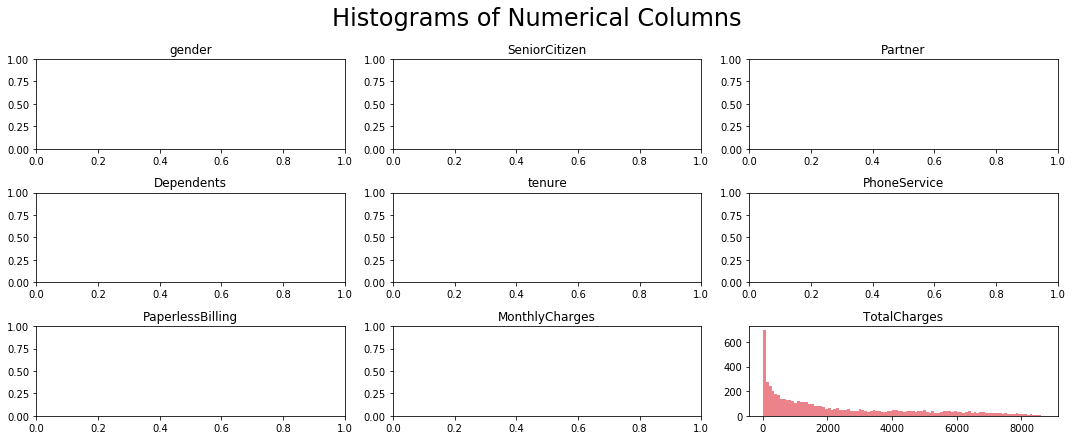

In [11]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca() #Cocentrate on a speficie one as you looping 
    f.set_title(dataset2.columns.values[i])

vals = np.size(dataset2.iloc[:, i].unique())
if vals >= 100:
    vals = 100

    
plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

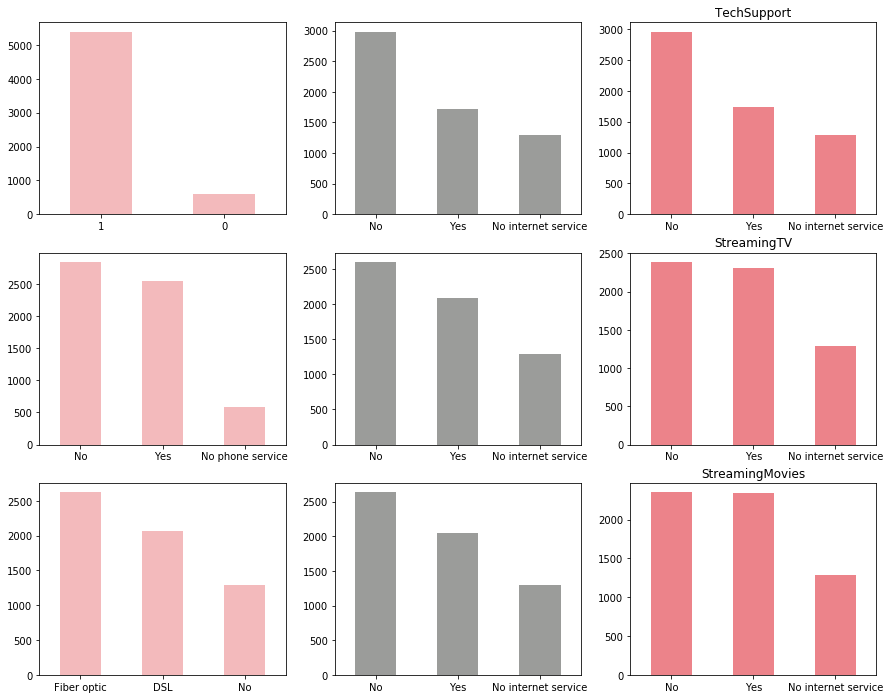

In [12]:
services= ['PhoneService','MultipleLines',
'InternetService','OnlineSecurity',  'OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))

for i, item in enumerate(services): #enumerate takes the counnt and the value as you interate into it 
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc')
    
    
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')
    
    
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
        ax.set_title(item)
    
    
    
    
    

A preliminary look at the overall churn rate shows that around 74% of the customers are active. this is an **imbalanced classification problem.**

*An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed.* The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes

Since most of the items are negative. 

Another solution: 
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/



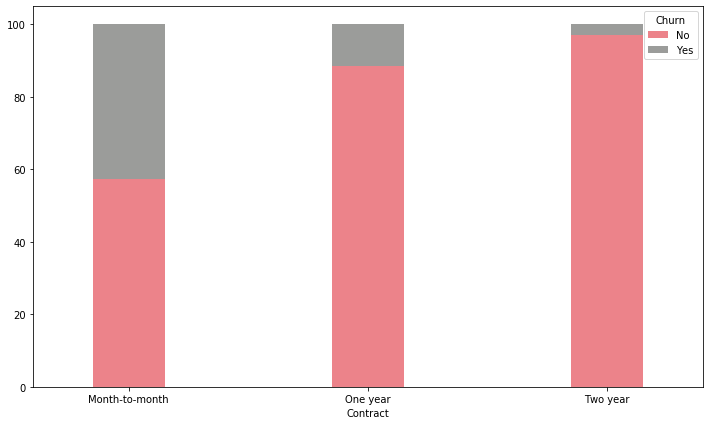

In [15]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['Contract','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

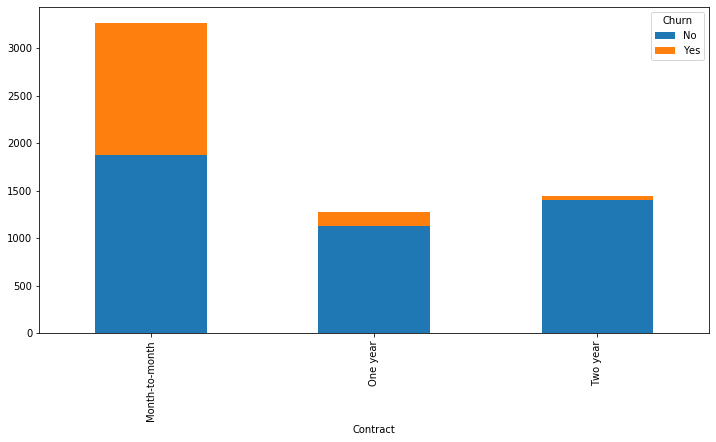

In [30]:
month_curn = data.groupby(['Contract','Churn']).size().unstack() 
#Note: ['Churn'].count() = .size()
month_curn.rename(columns = {0:'No', 1:'Yes'}, inplace = True )
month_curn.plot(kind = 'bar', stacked = True, figsize =(12,6))

### Always member you can compare things that are not the churn to have a better understanding of the data 


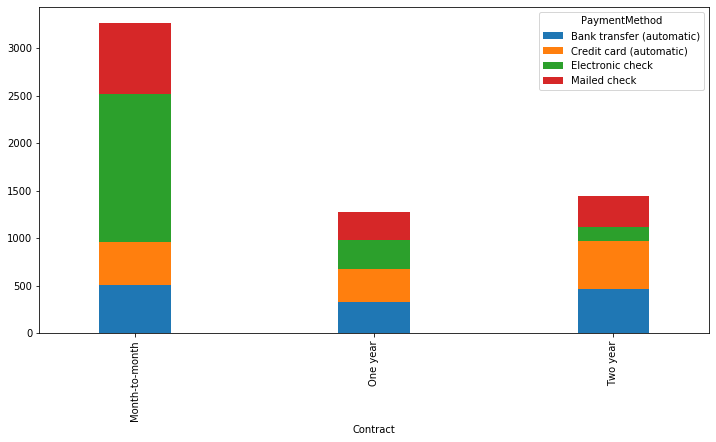

In [57]:
payment = data.groupby(['Contract','PaymentMethod']).size().unstack() 
#Note: ['Churn'].count() = .size()
payment.rename(columns = {0:'No', 1:'Yes'}, inplace = True )
payment.plot(kind = 'bar', stacked = True, width = 0.3,  figsize =(12,6))

#payment.yaxis.set_major_formatter(mtick.PercentFormatter()) #Scal

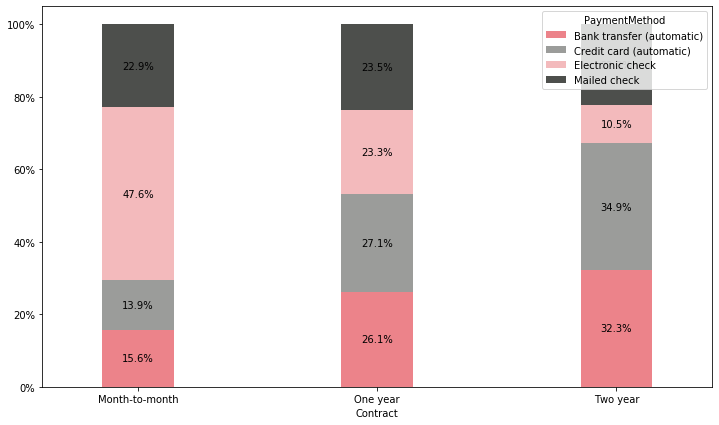

In [39]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['Contract', 'PaymentMethod']).size().unstack()
contract_churn.rename(columns= {0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #Scales to make each the same size 

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

## Coor

You can compare the coorliation for one thing speficially with another 

In [23]:
corrdata = data[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

In [10]:
correlations = corrdata.corrwith(data.Churn) #This gives the corrliation ratio. And negative and positive coorilation 
correlations = correlations[correlations!=1] # != checks if its not equal to 

positive_correlations = correlations[correlations >0].sort_values(ascending = False) #Checks for positive coorilation and sorts
negative_correlations = correlations[correlations <0].sort_values(ascending = False)

In [11]:
#correlations
#positive_correlations
negative_correlations 

Partner        -0.146840
Dependents     -0.160204
TotalCharges   -0.197570
tenure         -0.348469
dtype: float64

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

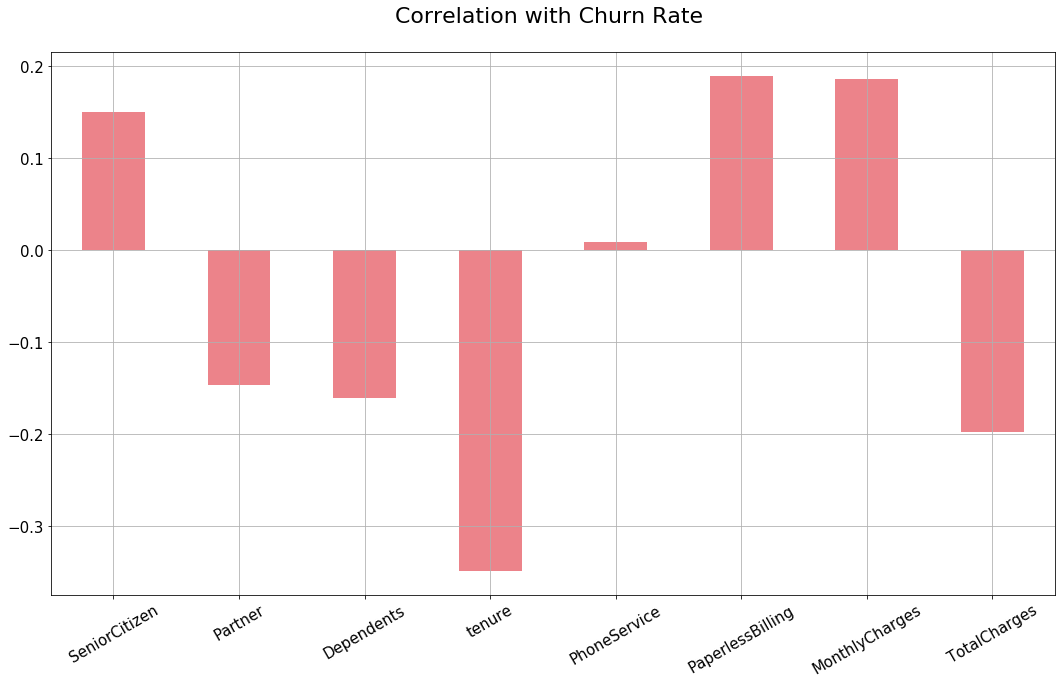

In [12]:
correlations.plot.bar(figsize = (18, 10), fontsize = 15, color = '#ec838a',rot = 30, grid = True) #Rot refers to axis titles

plt.title('Correlation with Churn Rate \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

## Check Multicollinearity using VIF

Multicollinearity occurs when **independent variables in a regression model are correlated.** This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

**Variance inflation factor (VIF)** is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, **the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance** of a model that includes only that single independent variable.

This ratio is calculated for each independent variable.**A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model**

VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [22]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return (vif)

dataset2 = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges', 'TotalCharges']]
calc_vif(dataset2)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

We can see here that the *‘Monthly Charges’ and ‘Total Charges’* have a high VIF value.

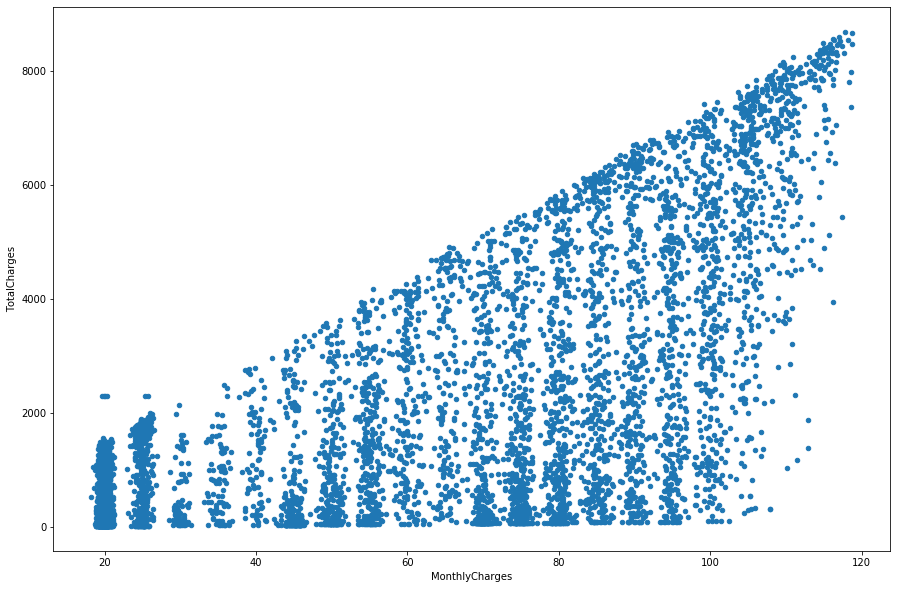

In [15]:
#Check colinearity:
    
corrdata[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize = (15, 10), x ='MonthlyCharges',y='TotalCharges')

In [15]:
#This its better to try remove one and check coorilianity. 

dataset2 = dataset2.drop(columns = 'TotalCharges')
calc_vif(dataset2)

,variables,VIF
0,gender,1.892746
1,SeniorCitizen,1.322522
2,Partner,2.820578
3,Dependents,1.902760
4,tenure,3.332850
5,PhoneService,5.956319
6,PaperlessBilling,2.739182
7,MonthlyCharges,7.551546


In [18]:
test_data = data.drop(columns = 'TotalCharges')

 In our example, after dropping the ‘Total Charges’ variable, *VIF values for all the independent variables have decreased to a considerable extent.*

Let’s try to summarise some of the key findings from this EDA:

- Strongest positive correlation with the target features is Monthly Charges and Age whilst negative correlation is with Partner, Dependents and Tenure.

- The dataset is imbalanced with the majority of customers being active.

- There is multicollinearity between Monthly Charges and Total Charges. Dropping Total Charges have decreased the VIF values considerably.

- Most of the customers in the dataset are younger people.

- There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer base that’s above 70 months old.

- Most of the customers seem to have phone service with Monthly charges spanning between $18 to $118 per customer.

## Encode categorical data 

Any categorical variable that has **more than two unique values have been dealt with Label Encoding and one-hot Encoding using get_dummies method in pandas here.**

In [19]:
#data.head()
index = test_data['customerID']
#data.drop(columns = ['Unnamed: 0','customerID'],)
#data.drop(columns = 'Unnamed: 0', inplace = True)
test_data.drop(columns = ['Unnamed: 0','customerID'],axis = 1,  inplace = True)

In [20]:
test_data = pd.get_dummies(test_data)

In [21]:
test_data = pd.concat([index, test_data], axis = 1)

In [22]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7010-BRBUU,1,0,1,1,72,1,0,24.10,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,9688-YGXVR,0,0,0,0,44,1,1,88.15,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
2,9286-DOJGF,0,1,1,0,38,1,1,74.95,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,6994-KERXL,1,0,0,0,4,1,1,55.90,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
4,2181-UAESM,1,0,0,0,2,1,0,53.45,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [23]:
test_data.to_csv('test_data.csv')

In [55]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'MultipleLines_No',
       ...
       'TotalCharges_992.7', 'TotalCharges_994.55', 'TotalCharges_994.8',
       'TotalCharges_995.35', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=5651)

### Model 

In [10]:
model_data = pd.read_csv(r'C:\Users\MATILYA\Documents\Self\ML\Kaggle\Telecom\test_data.csv')

In [11]:
model_data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,7010-BRBUU,1,0,1,1,72,1,0,24.10,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,9688-YGXVR,0,0,0,0,44,1,1,88.15,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
2,2,9286-DOJGF,0,1,1,0,38,1,1,74.95,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,3,6994-KERXL,1,0,0,0,4,1,1,55.90,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
4,4,2181-UAESM,1,0,0,0,2,1,0,53.45,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [12]:
model_data.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [13]:
y = model_data['Churn']

X = model_data.drop(columns = ['Churn'])

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify= y, test_size = 0.2)

#### Satisfy? 

*This helps when the y values have way more of one value than another.*

This stratify parameter makes a **split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.**

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [15]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4788, 40)
Number transactions y_train dataset:  (4788,)
Number transactions X_test dataset:  (1198, 40)
Number transactions y_test dataset:  (1198,)


In [16]:
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

### Scaling


In [17]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values # good to use to keep track of stuff 
X_train2.index = X_train.index.values
X_train = X_train2

In [18]:
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Model selection

## Generic model prediction 

**Classification Accuracy** is one of the most common classification evaluation metrics to compare baseline algorithms as its the number of correct predictions made as a ratio of total predictions. **However, it's not the ideal metric when we have class imbalance issue.**


Hence, let us sort the results based on the ‘Mean AUC’ value which is nothing but the model’s ability to discriminate between positive and negative classes.

In [11]:
#Models
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))

models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))

models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))

models.append(('Gaussian NB', GaussianNB()))

models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

In [12]:
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD','Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

**Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.**

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

K-Folds cross-validator


Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds 

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [13]:
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    
    
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')


    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,round(cv_auc_results.mean()*100, 2),round(cv_auc_results.std()*100, 2),round(cv_acc_results.mean()*100, 2), round(cv_acc_results.std()*100, 2)]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

#Thus it is predicting and cross validating with 10 vales

C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,83.96,1.55,74.71,1.52
1,SVC,83.62,1.43,79.70,2.08
4,Gaussian NB,81.30,1.56,68.51,1.84
6,Random Forest,80.62,1.90,77.30,1.68
2,Kernel SVM,79.34,2.04,79.01,2.38
3,KNN,76.12,1.53,75.17,1.10
5,Decision Tree Classifier,65.22,2.15,73.02,2.62


##  Visualize Classification Algorithms



Text(0.5, 1.0, 'Accuracy Score Comparison \n')

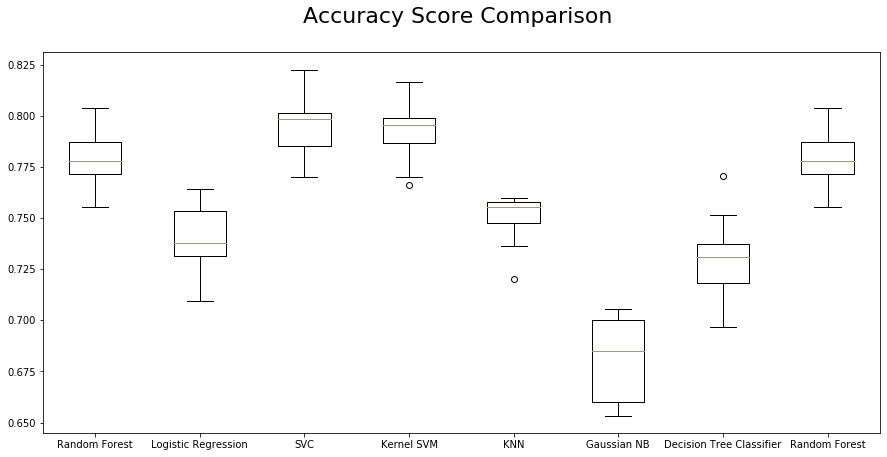

In [48]:
#Accuracy 
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")

Text(0.5, 1.0, 'ROC AUC Comparison \n')

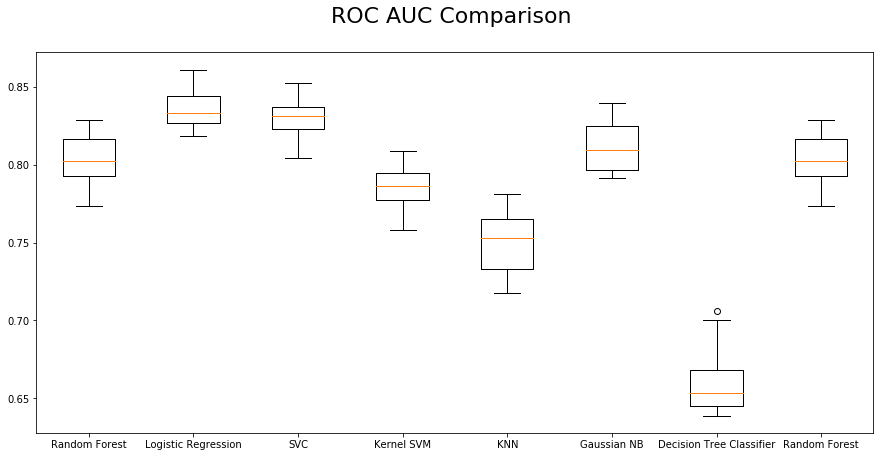

In [49]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

Using Area under ROC Curve: From the first iteration of baseline classification algorithms, we can see that Logistic Regression and SVC have outperformed the other five models for the chosen dataset with the highest mean AUC Scores. 

### Model optimization 1

I will use GridsearchCV but I will follow this tutorial to possibly learn something new. 


Therefore, let us write a for loop that iterates 20 to 30 times and gives the accuracy at each iteration so as to figure out the optimal number of K neighbors for the KNN Model.


Text(0.5, 1.0, 'Optimal Number of K Neighbors \n')

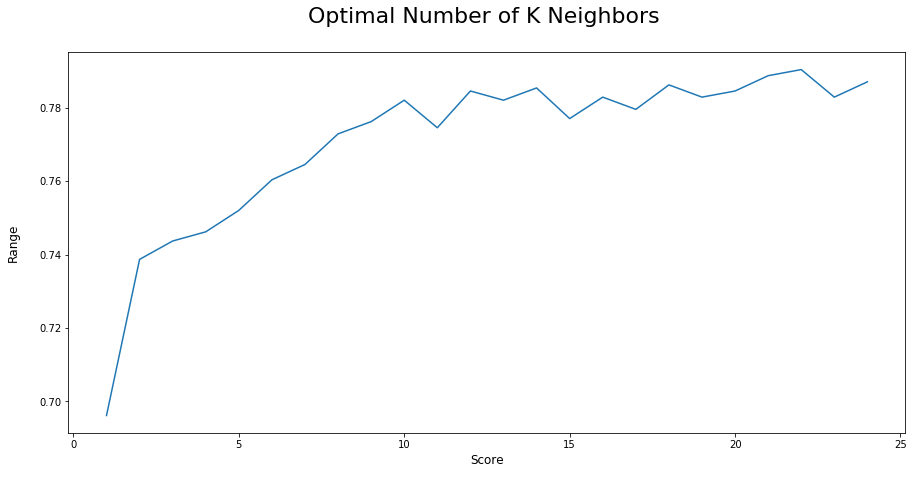

In [52]:
score_array = []
for i in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = i) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
    
fig = plt.figure(figsize=(15, 7))

plt.plot(range(1,25),score_array)

plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")

As we can see from the above iterations, if we use K = 22, then we will get the maximum score of 78%

#### Identify the optimal number of trees for Random Forest Model

Quite similar to the iterations in the KNN model, here we are **trying to find the optimal number of decision trees to compose the best random forest.**

Text(0.5, 0, 'Score\n')

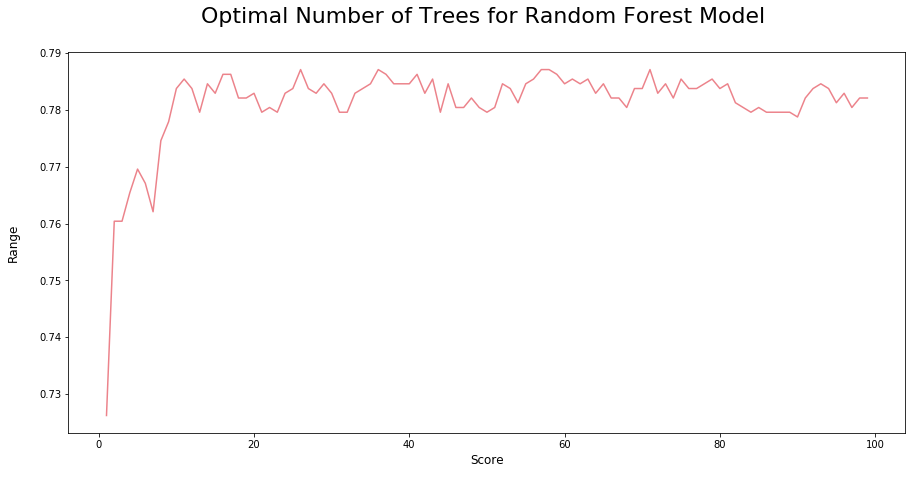

In [54]:
score_array = []
for i in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = i, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838b')

plt.title('Optimal Number of Trees for Random Forest Model \n',
          horizontalalignment="center", fontstyle = "normal", 
          fontsize = "22", 
          fontfamily = "sans-serif")

plt.ylabel('Range\n',horizontalalignment="center",
           fontstyle = "normal", fontsize = "large", 
           fontfamily = "sans-serif")

plt.xlabel('Score\n',horizontalalignment="center",
           fontstyle = "normal", fontsize = "large", 
           fontfamily = "sans-serif")

As we could see from the iterations above, the random forest model would attain the highest accuracy score when its n_estimators = 72.

In the second iteration of comparing baseline classification algorithms, we would be using the optimised parameters for KNN and Random Forest models. 

Also, we know that **false negatives are more costly than false positives in a churn and hence let’s use precision,** recall and F2 scores as the ideal metric for the model selection.

### Logistic Regression

In [19]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score']) #vales added, then the column names are added 

results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.799666       0.65  0.531447  0.584775  0.551567


### Support Vector Machine (linear classifier)

In [63]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.814691   0.690476  0.547170  0.610526  0.570866
1         SVM (Linear)  0.810518   0.678431  0.544025  0.603839  0.566470


### K-Nearest Neighbors

In [64]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(n_neighbors = 22,metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred  = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.814691   0.690476  0.547170  0.610526  0.570866
1          SVM (Linear)  0.810518   0.678431  0.544025  0.603839  0.566470
2  K-Nearest Neighbours  0.790484   0.621818  0.537736  0.576728  0.552683


### Kernel SVM

In [65]:
# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

#THis could be a function??

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.814691   0.690476  0.547170  0.610526  0.570866
1          SVM (Linear)  0.810518   0.678431  0.544025  0.603839  0.566470
2  K-Nearest Neighbours  0.790484   0.621818  0.537736  0.576728  0.552683
3            Kernel SVM  0.805509   0.680851  0.503145  0.578662  0.530856


### Naive Byes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, **a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.**

For example,* a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.*

https://www.youtube.com/watch?v=O2L2Uv9pdDA&ab_channel=StatQuestwithJoshStarmer

GausianNB = https://www.youtube.com/watch?v=H3EjCKtlVog&ab_channel=StatQuestwithJoshStarmer

In [66]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.814691   0.690476  0.547170  0.610526  0.570866
1          SVM (Linear)  0.810518   0.678431  0.544025  0.603839  0.566470
2  K-Nearest Neighbours  0.790484   0.621818  0.537736  0.576728  0.552683
3            Kernel SVM  0.805509   0.680851  0.503145  0.578662  0.530856
4            Naive Byes  0.691987   0.457711  0.867925  0.599349  0.736000


### Decision Tree



In [67]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.814691   0.690476  0.547170  0.610526  0.570866
1          SVM (Linear)  0.810518   0.678431  0.544025  0.603839  0.566470
2  K-Nearest Neighbours  0.790484   0.621818  0.537736  0.576728  0.552683
3            Kernel SVM  0.805509   0.680851  0.503145  0.578662  0.530856
4            Naive Byes  0.691987   0.457711  0.867925  0.599349  0.736000
5         Decision Tree  0.721202   0.477143  0.525157  0.500000  0.514797


### Random forest 

In [70]:
classifier = RandomForestClassifier(n_estimators = 72,criterion = 'entropy', random_state = 0) #72 was obtained before 

classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
#from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.814691   0.690476  0.547170  0.610526  0.570866
1          SVM (Linear)  0.810518   0.678431  0.544025  0.603839  0.566470
2  K-Nearest Neighbours  0.790484   0.621818  0.537736  0.576728  0.552683
3            Kernel SVM  0.805509   0.680851  0.503145  0.578662  0.530856
4            Naive Byes  0.691987   0.457711  0.867925  0.599349  0.736000
5         Decision Tree  0.721202   0.477143  0.525157  0.500000  0.514797
6         Random Forest  0.782137   0.620253  0.462264  0.529730  0.487078


In [72]:
results.sort_values(["Precision","Recall", "F2 Score"], ascending = False, inplace = True)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.814691   0.690476  0.547170  0.610526  0.570866
3            Kernel SVM  0.805509   0.680851  0.503145  0.578662  0.530856
1          SVM (Linear)  0.810518   0.678431  0.544025  0.603839  0.566470
2  K-Nearest Neighbours  0.790484   0.621818  0.537736  0.576728  0.552683
6         Random Forest  0.782137   0.620253  0.462264  0.529730  0.487078
5         Decision Tree  0.721202   0.477143  0.525157  0.500000  0.514797
4            Naive Byes  0.691987   0.457711  0.867925  0.599349  0.736000


From the 2nd iteration, we can definitely conclude that logistic regression is an optimal model of choice for the given dataset as it has:

- relatively the highest combination of precision, recall and F2 scores; 
- giving most number of **correct positive predictions while minimizing the false negatives** (Precision)

## Model Evaluation

Logistic regression was the best performing model. 


In [21]:
classifier = LogisticRegression(penalty = 'l2') #I think pentalty is how it deals with overfitting 
#This penalty term is also known as the L2 norm or L2 penalty. It is calculated as the square root of the...
#...sum of the squared vector values. This term will help shrink the coefficients in the regression towards zero.

classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.799666       0.65  0.531447  0.584775  0.551567


C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)

print(accuracies)

print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(),  accuracies.std() * 2))

C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

[0.81837161 0.79958246 0.81210856 0.78705637 0.82881002 0.80793319
 0.81628392 0.78496868 0.80167015 0.77777778]
Logistic Regression Classifier Accuracy: 0.80 (+/- 0.03)


#### Visualize results on a Confusion Matrix

Accuracy rate = number of correct predictions/ total predictions * 100

Error rate = Number of wrong predictions / total predictions * 100



In [17]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))


<Figure size 2016x1440 with 0 Axes>

<Figure size 2016x1440 with 0 Axes>

In [27]:
cm

array([[804,  76],
       [154, 164]], dtype=int64)

In [28]:
df_cm

,0,1
0,804,76
1,154,164


Text(0.5, 26.5, 'Predicted label\n')

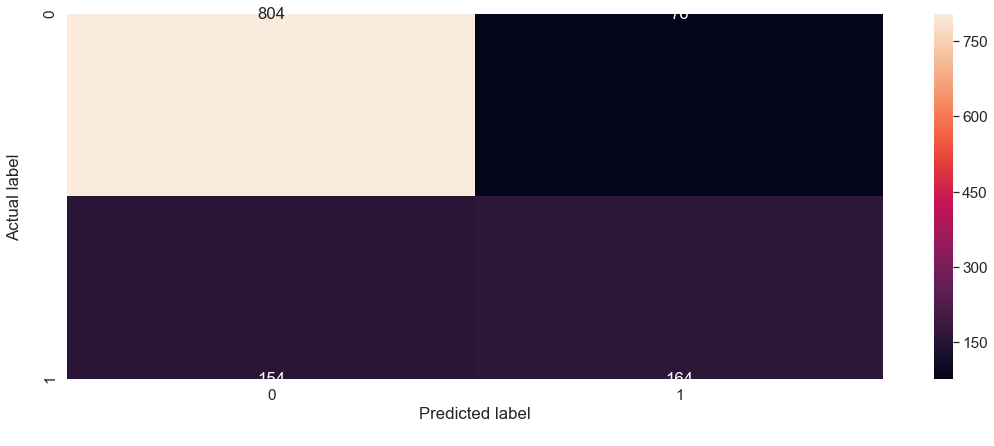

In [37]:
#fig, ax = plt.subplots()
plt.figure(figsize = (15,6))
sn.heatmap(df_cm, annot = True,fmt = 'g')

plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### Evaluate the model using ROC Graph

It’s good to re-evaluate the model using ROC Graph. **ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score.**

The orange line represents the ROC curve of a random classifier while a good classifier tries to remain as far away from that line as possible. As shown in the graph below, the fine-tuned Logistic Regression model showcased a higher AUC score.

C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

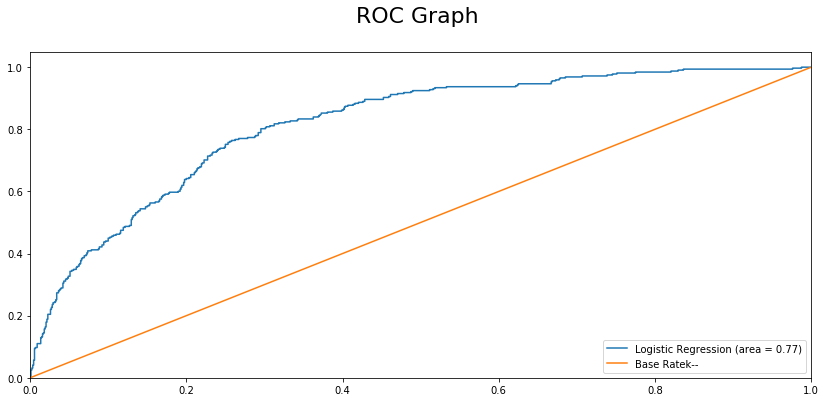

In [15]:
classifier.fit(X_train, y_train) 

probs = classifier.predict_proba(X_test) 
probs = probs[:, 1]

classifier_roc_auc = accuracy_score(y_test, y_pred )

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")

plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/

The ROC curve shows the **trade-off between sensitivity (or TPR) and specificity (1 – FPR).**

Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

- Area Under Curve

To compare different classifiers, it can be useful to summarize the performance of each classifier into a single measure.**One common approach is to calculate the area under the ROC curve, which is abbreviated to AUC.**  It is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance, i.e. it is equivalent to the two sample Wilcoxon rank-sum st

### Predict Feature Importance

 Logistic Regression allows us to determine the key features that have **significance in predicting the target attribute.**
 
 

In [24]:
# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(model_data.drop(columns = 'customerID').columns, columns = ["features"]),
pd.DataFrame(np.transpose(classifier.coef_), 
columns = ["coef"])],axis = 1)

feature_importances.sort_values("coef", ascending = False)

,features,coef
32,StreamingMovies_Yes,0.297132
12,InternetService_DSL,0.275619
6,PaperlessBilling,0.153180
14,InternetService_No,0.119252
37,PaymentMethod_Credit card (automatic),0.117782
1,SeniorCitizen,0.099024
23,DeviceProtection_Yes,0.095551
28,StreamingTV_No internet service,0.094729
31,StreamingMovies_No internet service,0.083338
17,OnlineSecurity_Yes,0.062991


The table above shows what the model lickly predicts a churn based on the feature.  

## Model Improvement

There are two types of parameters in any machine learning model — the first type are the kind of parameters that the model learns; **the optimal values automatically found by running the model.** **The second type of parameters is the ones that user get to choose while running the model.** Such parameters are called the hyperparameters; a set of configurable values external to a model that cannot be determined by the data, and that we are trying to optimize through Parameter Tuning techniques like Random Search or Grid Search



In [22]:
# Round 1:
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 52.27 seconds


C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.75100782900841, {'C': 0.001, 'penalty': 'l2'})

Its worse

In [23]:
# Round 2:
# Select Regularization Method
import time
penalty = ['l2']
# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# Combine Parameters
parameters = dict(C=C, penalty=penalty) #Instead of making a dictionary 
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 2.29 seconds


C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.75100782900841, {'C': 0.001, 'penalty': 'l2'})

In [24]:
lr_classifier = LogisticRegression(penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Comparing results 

In [26]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])

[[789  91]
 [149 169]]


PRED,0,1
ACTUAL,,
0,145,40
1,55,14


Test Data Accuracy: 0.7997


<Figure size 1080x432 with 0 Axes>

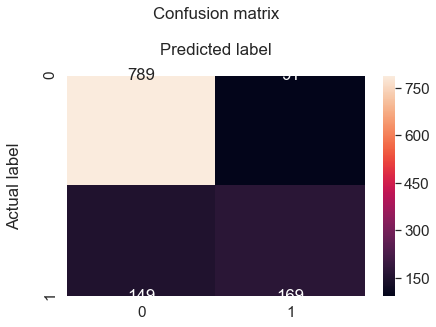

In [39]:
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (15,6))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
#class_names=[0,1]
#tick_marks = np.arange(len(class_names))
plt.tight_layout()

plt.title('Confusion matrix\n', y=1.1)
#plt.xticks(tick_marks, class_names)
#plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [40]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

      customerID  Churn  predictions  propensity_to_churn(%) Ranking
4249  6481-ESCNL      0            1                   50.91       3
2021  2887-JPYLU      0            0                    9.32       7
344   8473-VUVJN      1            1                   77.93       1
5317  2675-OTVVJ      0            0                   45.73       3
1057  7439-DKZTW      0            1                   74.41       1
...          ...    ...          ...                     ...     ...
3360  5168-MSWXT      0            1                   74.98       1
4     2181-UAESM      0            0                   29.08       4
4496  2428-ZMCTB      0            0                   12.65       6
5561  9494-BDNNC      0            0                   12.40       6
1247  7322-OCWHC      0            0                    2.70       9

[1198 rows x 5 columns]


In [41]:
pd.DataFrame(final_results)

,customerID,Churn,predictions,propensity_to_churn(%),Ranking
4249,6481-ESCNL,0,1,50.91,3
2021,2887-JPYLU,0,0,9.32,7
344,8473-VUVJN,1,1,77.93,1
5317,2675-OTVVJ,0,0,45.73,3
1057,7439-DKZTW,0,1,74.41,1
...,...,...,...,...,...
3360,5168-MSWXT,0,1,74.98,1
4,2181-UAESM,0,0,29.08,4
4496,2428-ZMCTB,0,0,12.65,6
5561,9494-BDNNC,0,0,12.40,6


So the higher the rank, the less lickly they are to churn 


- qcut

The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that **qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.**

pd. Desscribe uses this to produce the iqr pf 25%,50% and 75%.



In [42]:
filename = 'final_model.model'
i = [lr_classifier]
joblib.dump(i,filename)

['final_model.model']